# Regular Expressions in action

Import the 're' library that helps in resolving regular expressions in Python

In [1]:
import re

Regex have the capability to match simple expressions using ordinary characters as well as complex patterns using special characters.

- **Ordinary characters include simple alphabets, numbers and symbols.**

Ordinary characters are used to get exact matches e.g. if you wanted to wanted to find the occurences of the term 'Python' in some text then your regex would be -->'*Python*'.

- **Special characters allow you to create generic pattern in text that are more like a 'Closest match'.**

For example if you want to match an email address then you cannot specify an exact match since people have a different emails. However there is a pattern that you can use to your benefit. proper emails will always have an '**@**' symbol in the middle and end with '**.com**'. Let's see how we can find this pattern.


Generate some random text

In [2]:
#random text with emails
txt ='''We have contacted Mr. Jhon Doe and have confirmed that he will be joining us for the meeting this evening. If you would like to contact him yourself you can call him on +1-415-5552671 or email him at jhon.doe@outlook.com. We also have the contact details of his assistant, you can contact him in case Mr. Doe does not respond. The assistants email id is jack_smith12@outlook.com.'''

To find the provided pattern we use the *re.search()* function.

In [3]:
plain_text = re.search('assistant', txt) #find the word assistant in the above text

to find the word 'assistant' we simply used it as an expression.

the *re.seach()* function returns the first occurence of th eprovided expresssion as well as its indexes.

In [4]:
plain_text #print out the result

<re.Match object; span=(262, 271), match='assistant'>

In [7]:
print(txt[262:271]) #print just the match

assistant


In [10]:
print(plain_text.span()) #print indexes where the match was found

(263, 272)


Now lets try a more complex pattern and find the email addresses in the text

In [60]:
email = re.search(r'\S+@{1}\S+(.com){1}',txt) #regex to find an email address

In [61]:
print(email) #found the first occuring email

<re.Match object; span=(201, 221), match='jhon.doe@outlook.com'>


let's understand the regex a little bit.

- \S : Finds a non-whitespace character
- \+ : Specifies to find 1 or more non-whitespace occurences
- @ : Exact match, specifies to find a '@' symbol.
- {1} : specifies to find only 1 '@' symbol.
- \S : Again specifies to find non-whitespace characters.
- \+ : Find atleast 1 non-white space characters.
- [.com] : Find exact match for .com
- {1} : Find exactly one occurence for '.com'

### Find all occurences

if we want to extract all occurences of the provided regex, then we use the *re.findall()* function

In [8]:
emails = re.findall(r'\S+@{1}\S+(?:\.com)', txt) #finding all emails

In [9]:
print(emails)

['jhon.doe@outlook.com', 'jack_smith12@outlook.com']


### Substitue Expression

We can substitue the given expression with a string of our own using the *re.sub()* function.

In [12]:
substituted_string = re.sub(r'\S+@{1}\S+(.com){1}', '-----------', txt) #remove emails from the given text.

In [13]:
print(substituted_string)

We have contacted Mr. Jhon Doe and have confirmed that he will be joining us for the meeting this evening. If you would like to contact him yourself you can call him on +1-415-5552671 or email him at -----------. We also have the contact details of his assistant, you can contact him in case Mr. Doe does not respond. The assistants email id is -----------.


Job Done!

This feature can be used to redact documents. 

Say we want to remove emails from a text so that no confidentional contact information is exposed.

We can simple substitue it with an \<email\> tag

In [14]:
redacted = re.sub('\S+@{1}\S+(.com){1}', '<email>', txt)

In [15]:
print(redacted)

We have contacted Mr. Jhon Doe and have confirmed that he will be joining us for the meeting this evening. If you would like to contact him yourself you can call him on +1-415-5552671 or email him at <email>. We also have the contact details of his assistant, you can contact him in case Mr. Doe does not respond. The assistants email id is <email>.


### Multiple expressions in a single line.

Say we want to find email as well as the time mentioned in the meeting. 

We can specify an OR expression to tell python to match either expression1 or expression2 or both.


In [56]:
re.findall('\S+@{1}\S+[.com]{1}|\+[0-9]{1}-[0-9]{3}-[0-9]{7}', txt)

['+1-415-5552671', 'jhon.doe@outlook.com.', 'jack_smith12@outlook.com.']

In [57]:
redacted = re.sub('\S+@{1}\S+[.com]{1}|\+[0-9]{1}-[0-9]{3}-[0-9]{7}', '<confidential>', txt)

In [16]:
print(redacted)

We have contacted Mr. Jhon Doe and have confirmed that he will be joining us for the meeting this evening. If you would like to contact him yourself you can call him on +1-415-5552671 or email him at <email>. We also have the contact details of his assistant, you can contact him in case Mr. Doe does not respond. The assistants email id is <email>.


### Common regex metacharacters

Square brackets define a list or range of characters to be found:

[abc]: matches a, b or c

[a-z]: matches any lower case letter

[A-Za-z]: matches any letter

[A-Za-z0-9]: matches any letter or any digit

. : matches any single character

* : matches the preceding element zero or more times, e.g. colou*r matches color, colour, colouur, etc.

?: matches when the preceding character appears zero or one time, e.g. colou?r matches color and colour

+: matches the preceding element one or more times, e.g. .+ matches ., .., ... etc.

{N}: matches the preceding character N times

{N,}: matches the preceding character N or more times

{N,M}: matches the preceding character at least N times, but not more than M times

\ :used to escape the following character when that character is a special character e.g. to find .org you have to use the regular expression \.org because . is the special character that matches any character

^: asserts the position at the start of the line

$ :asserts the position at the end of the line

|: means or

And then there are:

\d :matches any single digit

\w :matches any part of word character and is equivalent to [A-Za-z0-9]

\s :matches any space, tab, or newline

\b :asserts that the pattern must match at a word boundary

/i :renders an expression case-insensitive equivalent to [A-Za-z]

^ab : must start with ab

ed$ : must end with ed

ab{2,4}c : b can be 2 3 or 4

ab*c : ac,abc,abbc,ab......bc

ab+c : at least one b is needed

ab?c : abc or ac

a.c : a anything c

a\.c : a.c

[^abc] : expect of abc

[abc]+ : at least one of them

\d\d or \d{2} : means 2 digits

\w+ : at least one character



 Python’s re.compile() method is used to compile a regular expression pattern provided as a string into a regex pattern object (re.Pattern). Later we can use this pattern object to search for a match inside different target strings using regex methods such as a re.match() or re.search().

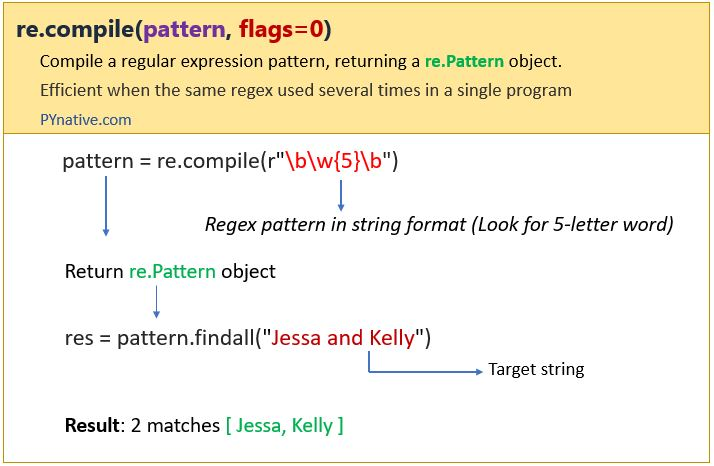

In [17]:
clean = re.compile("(?i)([^0-9a-z ])")

In [19]:
text = "Salam Khobi? Haha.!"

result = clean.sub("#", text)

result

'Salam Khobi# Haha##'